# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue"> Dhananjay Arora </font>

# I. Overview

Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of neural network methods based on artificial neural networks. Learning can be supervised, semi-supervised or unsupervised.
Deep learning architectures such as deep neural networks, deep belief networks recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases superior to human experts.

Deep-learning networks are distinguished from the more commonplace single-hidden-layer neural networks by their depth; that is, the number of node layers through which data must pass in a multistep process of pattern recognition.
In deep-learning networks, each layer of nodes trains on a distinct set of features based on the previous layer’s output.
Deep-learning networks perform automatic feature extraction without human intervention, unlike most traditional machine-learning algorithms. Feature extraction is a task that can take teams of data scientists years to accomplish, deep learning is a way to circumvent the chokepoint of limited experts. It augments the powers of small data science teams, which by their nature do not scale.

- In this assignment, I will make a deep learning network using Tensorflow and Keras.
- I will use my classification dataset i.e. bank marketing campaign dataset.
- I will pick at least 3 different networks for experiments.
- Will explain the code for Tensorflow or Keras.
- There will be a comparison of the 3 deep learning networks made with the help of some classification metrics.

Overall, this assignment will provide an idea about creating a deep learning network and visualizing the results, along with comparison of run times of Local vs GPU.




# II. Data
### (this section has classification data and its visualization and preliminary analysis)

## a) Introduction of data for Classification & source

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There is a dataset: 
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:
Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## b) Reading the data

- The data is present in a comma separated value file. Fetching the records from the CSV file.
- Header information is there in the CSV file.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst
warnings.filterwarnings('ignore')

Reading dataset and making a feature list.

In [2]:
data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")

## c) Preprocessing of the data

Converting the target feature values as No = 0 and Yes = 1

In [3]:
complete_data['y'] = complete_data['y'].map({'no' : 0, 'yes' : 1})


In [4]:
print(complete_data['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


Checking the data type of the dataset

In [5]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

Printing count of rows and columns as below:

In [6]:
complete_data.shape

(41188, 21)

It can be seen that there are 41188 rows and 21 feature values.

Performing some basic mathematical function on data set using describe() as below:

In [7]:
complete_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Listing the top 10 rows as below:

In [8]:
complete_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Listing the last 10 rows as below:

In [9]:
complete_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,1
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


Checking whether the data contains any null value as below:

In [10]:
complete_data.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

There is no null value in the dataset as it can be seen above.

Extracting the important feature list as below:

In [11]:
important_cols=complete_data.columns.tolist()
feature_list=important_cols[:9] + important_cols[11:]
print(feature_list)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Defining the data partition method below by taking 80% as training dataset and remaining as testing dataset.

In [12]:
def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

Dividing the dataset into training and test set.

In [13]:
data_partitions=partition_data(complete_data)
train_dataset=data_partitions[0]
print("The Shape of train data set is",train_dataset.shape)
test_dataset=data_partitions[1]
test_dataset.shape
print("The Shape of test data set is",test_dataset.shape)

The Shape of train data set is (32950, 21)
The Shape of test data set is (8238, 21)


Some basic mathematical computataions on dataset are as below:

In [14]:
train_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.026586,255.954780,2.671259,993.752473,0.072868,0.650337,93.704204,-40.637542,4.268969,5195.140176,0.063733
std,9.354139,261.236307,2.970139,72.022331,0.274573,1.160255,0.480555,3.866698,1.283868,44.854437,0.244280
min,18.000000,0.000000,1.000000,0.000000,0.000000,-1.800000,92.756000,-50.000000,1.299000,5099.100000,0.000000
25%,33.000000,100.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.700000,4.191000,5191.000000,0.000000
50%,39.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.864000,5195.800000,0.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.000000
max,95.000000,4918.000000,56.000000,999.000000,3.000000,1.400000,94.465000,-36.100000,5.045000,5228.100000,1.000000


Top 10 rows, below:

In [15]:
train_dataset.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Last 10 rows below:

In [16]:
train_dataset.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32940,46,admin.,married,basic.6y,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32941,25,student,single,high.school,unknown,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32942,27,entrepreneur,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32943,32,blue-collar,married,basic.6y,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32944,38,services,married,high.school,unknown,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32945,36,admin.,married,high.school,no,yes,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32946,49,blue-collar,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32947,30,technician,single,basic.9y,no,no,yes,cellular,may,mon,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32948,32,technician,single,high.school,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
32949,34,technician,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


Checking dataset for any null values below:

In [17]:
train_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No null values seen above.

## d) Visualization of the data

Now we will vizualize the dataset.

**Plotting the Distribution Curves for the feature variables as below:**

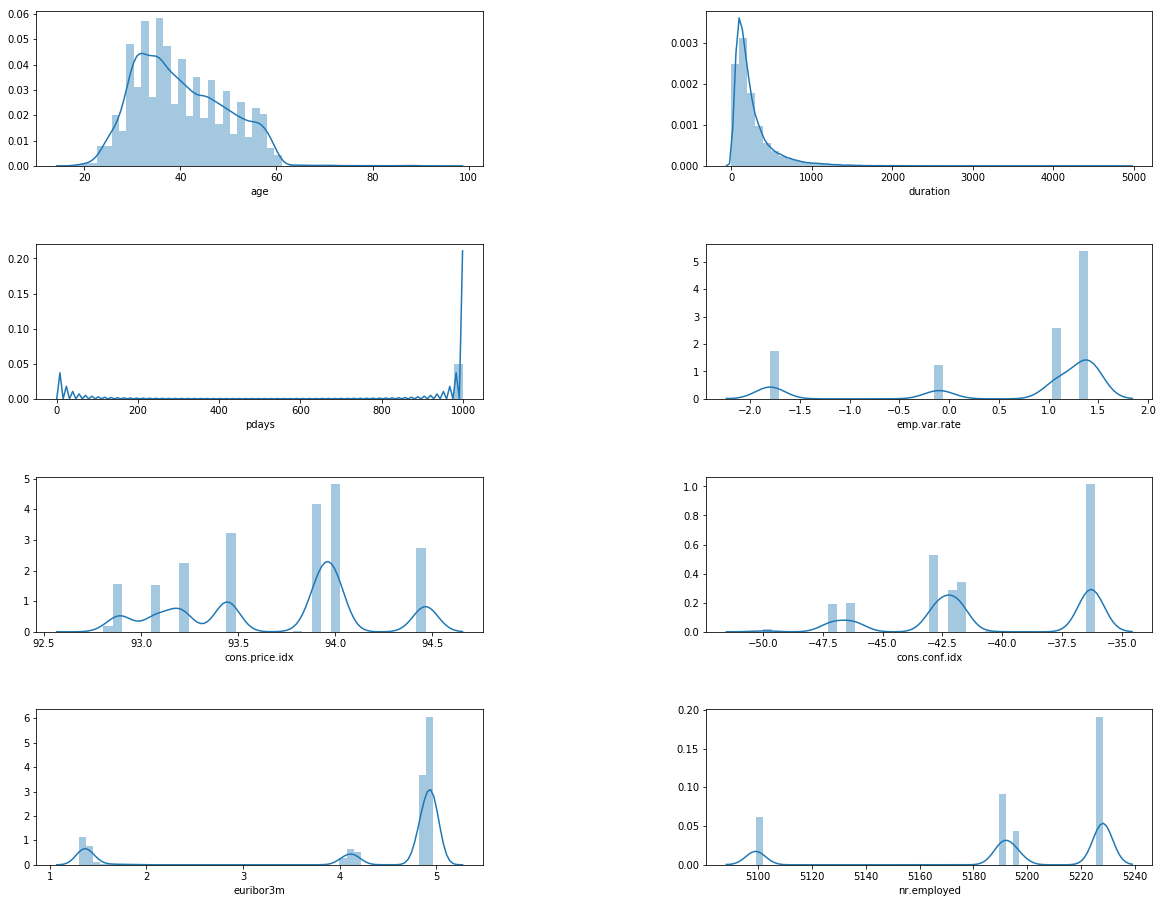

In [18]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['age','duration','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(5,2, i)
    ax = sns.distplot(train_dataset[distribution_plot_list[(i-1)]])

From the above image, it can be seen that mostly the age of customers is between 20 and 60. 

Also, consumer price index (monthly) is between 92.0 and 95.0

Since the number of pdays mostly is 999, that means most of the customers are new customers. 

Employment variation rate (quarterly indicator) value varies from -4 to 2.

Almost all individual call duration was between 0 and 1000 seconds.

Consumer confidence index (monthly indicator) value lies between -50 and -25 mostly.

Euribor 3 month rate - daily indicator mostly has value as 5.

Number of employees - quarterly indicator value varies from 4950 to 5250 mostly.

**Below is the correlation matrix**

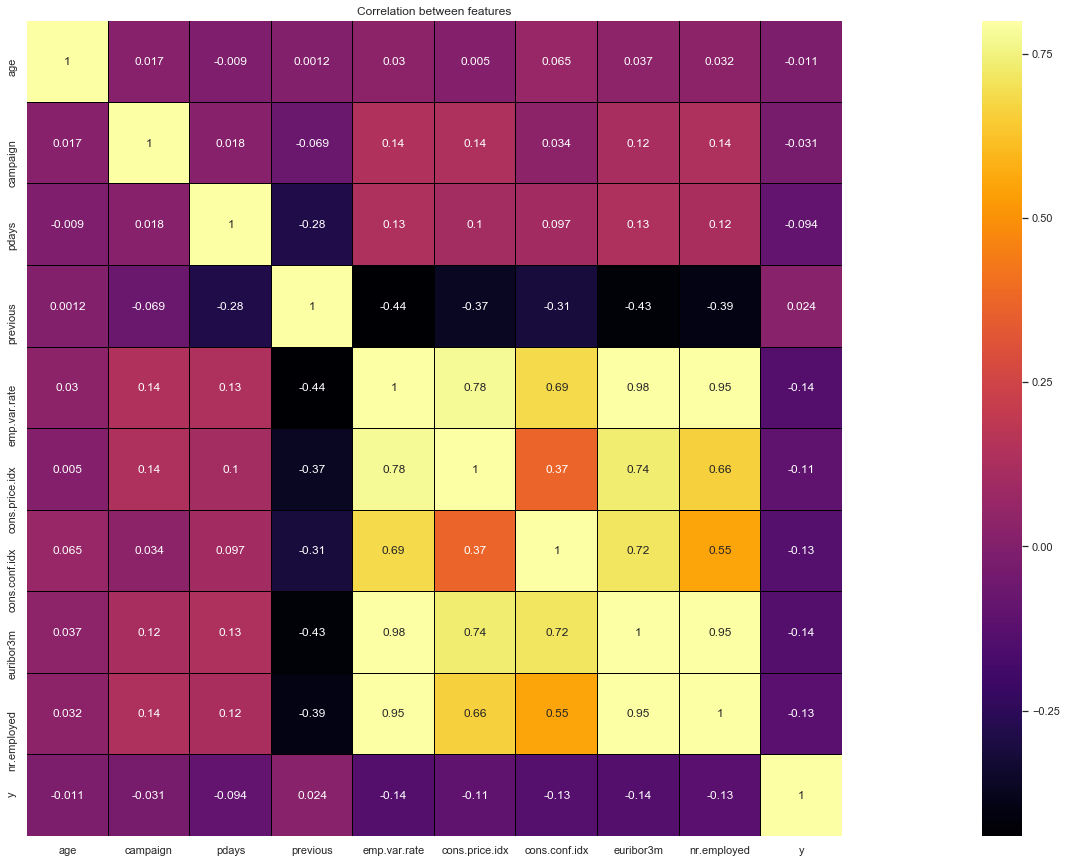

In [19]:
correlation_matrix=train_dataset[feature_list].corr()
sns.set(font_scale=1)
plt.figure(figsize=(50, 15))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='inferno',linecolor="black")
plt.title('Correlation between features');

Considering the above feature values, Number of contacts performed before this campaign and for this client is more related to client subscribing a term deposit as compared to other relations.

**Below is the bar-plot for client subscribing a term deposit vs his/her age**

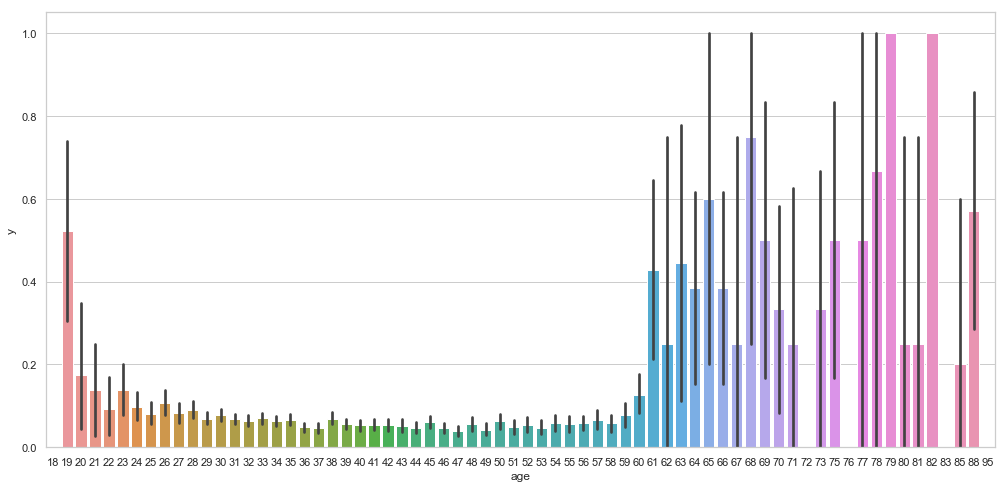

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,8))
ax = sns.barplot(x="age", y="y", data=train_dataset)

From the above bar-plot, it can be observed that major range of people who do not subscribe to the term deposit plan have age between 25 and 60. Elderly people subscribe the most to this plan.

Below is the bar plot for client subscribing a term deposit VS number of contacts performed during this campaign and for this client:

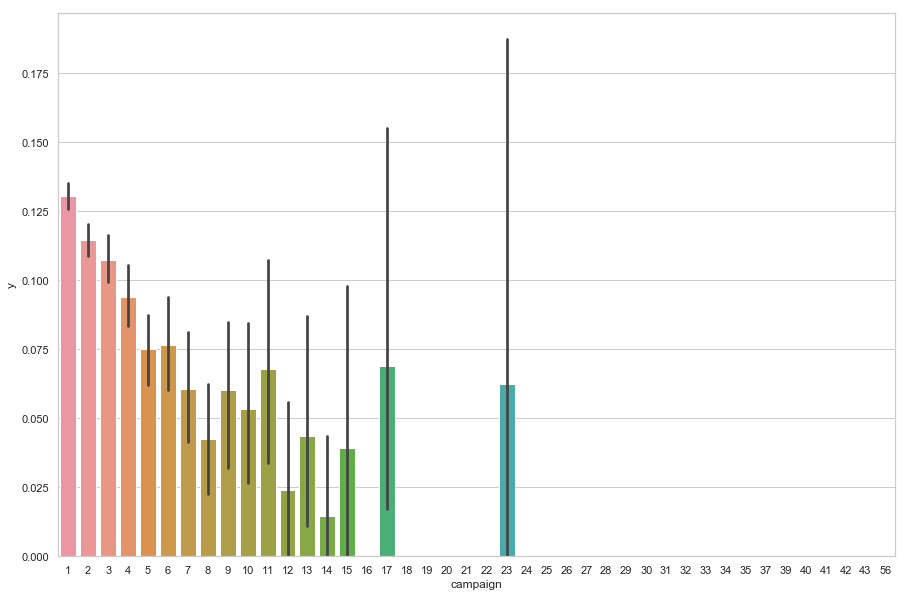

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="campaign", y="y", data=complete_data)

Most people bought the plan when the number of contacts performed during this campaign and for this client was 1. (observed from above figure) - on whole data

Below is the bar plot for client subscribing a term deposit VS type of job

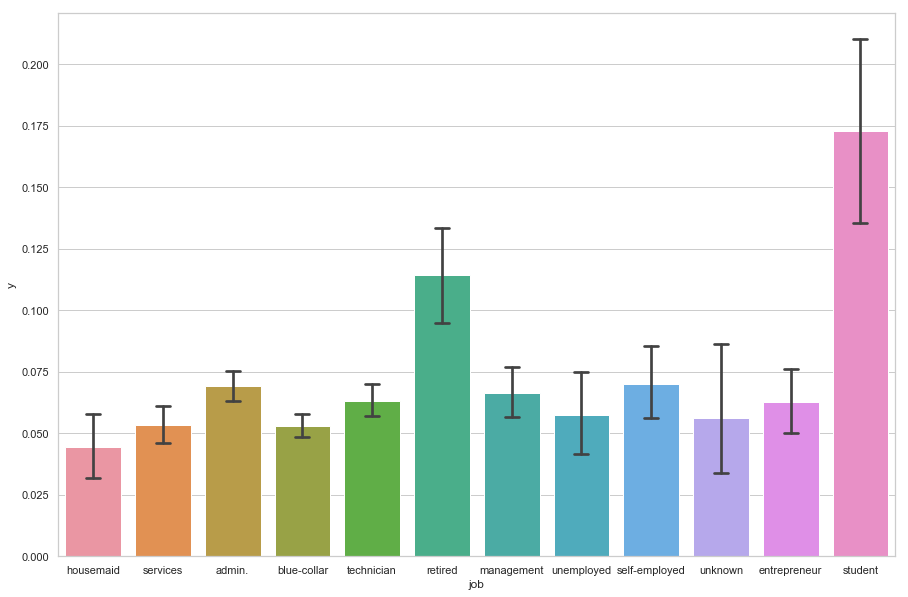

In [22]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="job", y="y", data=train_dataset, capsize=.2)

This above plot shows that students tend to subscribe more to the term-deposit plan and second come the retired people; whereas least term-deposit plans are subscribed by blue-collar job people and housemaid.

Below is the bar plot for client subscribing a term deposit VS their marital status:

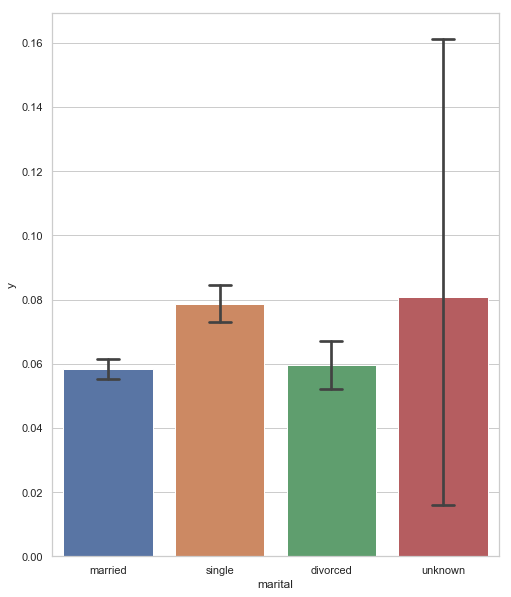

In [23]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x="marital", y="y", data=train_dataset, capsize=.2)

Mostly of the clients who have subscribed to term-deposit have not disclosed their marital status.
Second number is of clients who are single.

Below is the bar plot for client subscribing a term deposit VS education level:

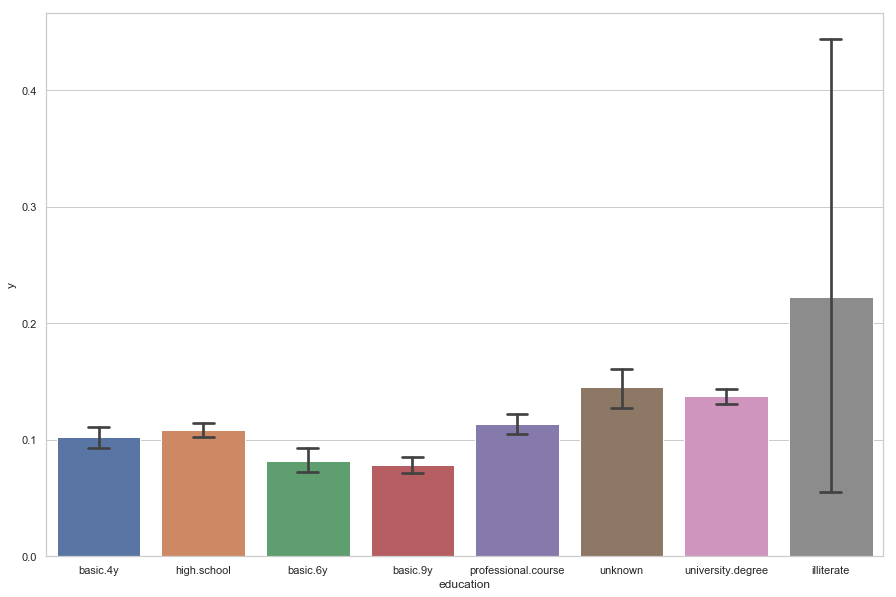

In [24]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="education", y="y", data=complete_data, capsize=.2)

Most clients who subscribe to this term-deposit plan are illiterate and least clients are those who have had only 9 years of education. (on complete data)

Below is the bar plot for client subscribing a term deposit VS clients having credit in default:

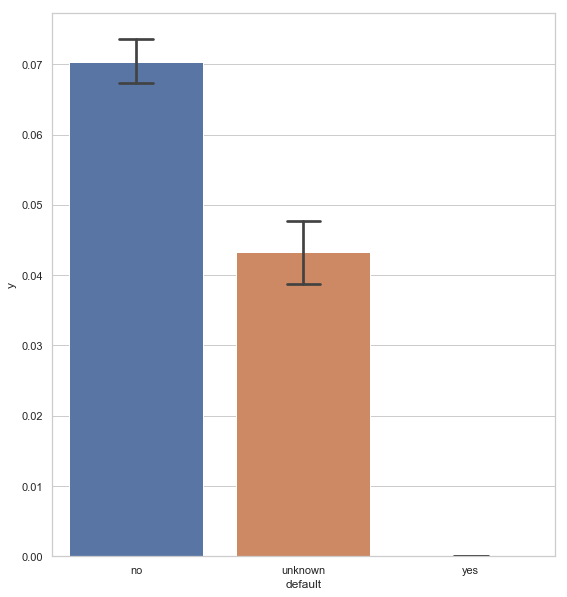

In [25]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="default", y="y", data=train_dataset, capsize=.2)

Most of the plans are bought by clients who have no credit in default.(seen from above plot)

Below is the bar plot for client subscribing a term deposit VS last contact month of year:

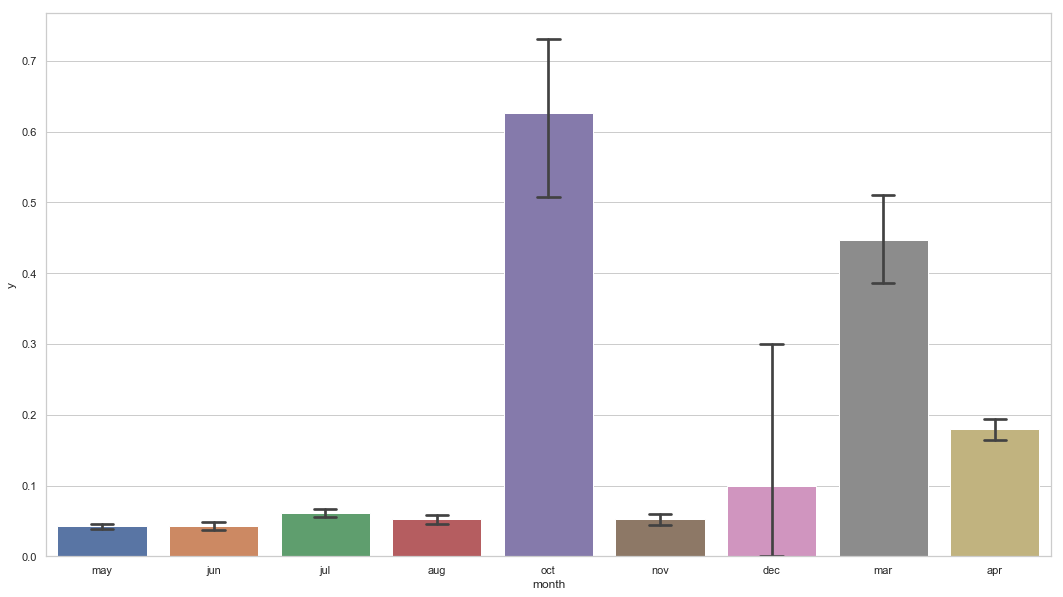

In [26]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x="month", y="y", data=train_dataset, capsize=.2)

Most term-deposits were subscribed in March and October(seen from plot above).

Below is the bar plot for client subscribing a term deposit VS the last contact day of the week:

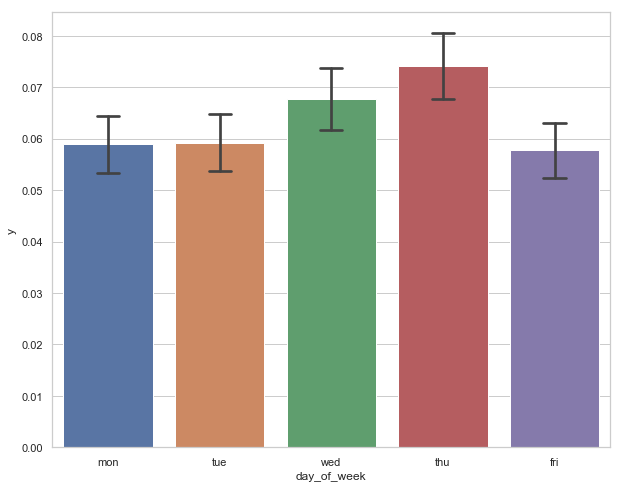

In [27]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="day_of_week", y="y", data=train_dataset, capsize=.2)

It can be observed from image above is that most of the term deposit were subscribed Thursdays.

Below is the bar plot for client subscribing a term deposit VS outcome of the previous marketing campaign:

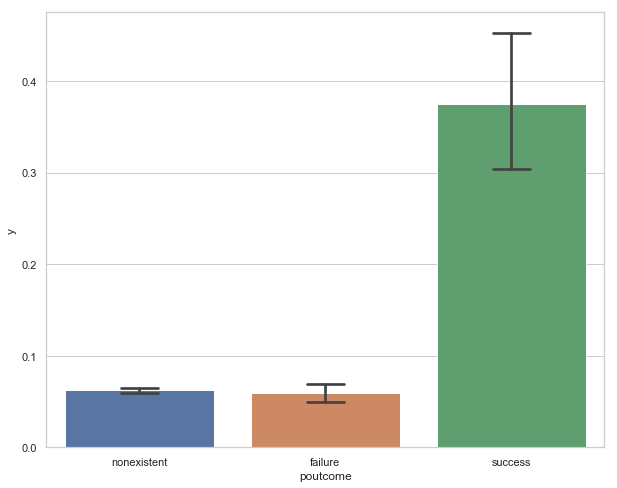

In [28]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="poutcome", y="y", data=train_dataset, capsize=.2)

In most cases, the outcome of the previous marketing campaign was success for those who subscribed to term deposit.

Below is the bar plot for client subscribing a term deposit VS Contact communication type:

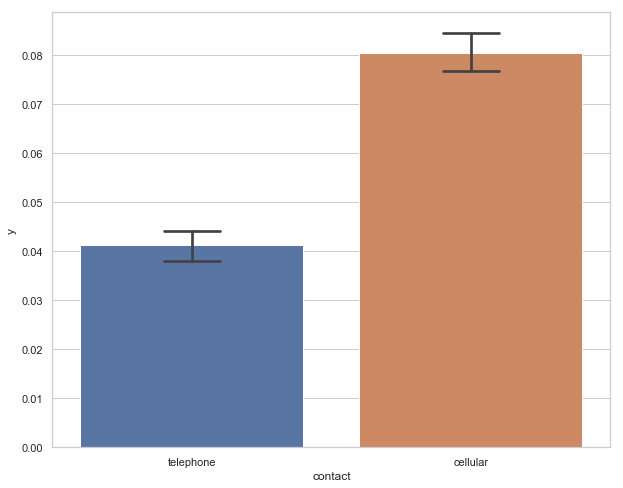

In [29]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="contact", y="y", data=train_dataset, capsize=.2)

It can be seen that most of the communication was cellular when a term deposit was subscribed.

## e) Preliminary observation

Below is the list of observations from the classification data provided.

Most clients who subscribed to the plan were:
- Elderly people (checked from age plot)
- when the number of contacts performed during this campaign and for this client was 1 (one)
- Students and retired clients
- Clients having no credit in default

Also, it was observed that most term-deposits were subscribed:
- in March and October months
- on Thursdays 
- when most of the communication was cellular.

Some other observations were also there and are listed above along with their plots.

#### Making the data columns and reading the dataset from CSV file.

Making No as 0 and Yes as 1 in Output Feature.

In [30]:
data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")
complete_data['y'] = complete_data['y'].map({'no' : 0, 'yes' : 1})
print(complete_data['y'].value_counts())

0    36548
1     4640
Name: y, dtype: int64


Making all string values to numerical.

In [31]:
complete_data['job'] = complete_data['job'].map({'admin.' : 1, 'blue-collar' : 2, 'entrepreneur' : 3, 'housemaid' : 4,'management' : 5, 'retired' : 6,'self-employed' : 7, 'services' : 8, 'student' : 9, 'technician' : 10,'unemployed' : 11, 'unknown' : 12})
complete_data['marital'] = complete_data['marital'].map({'divorced' : 1, 'married' : 2,'single' : 3, 'unknown' : 4})
complete_data['education'] = complete_data['education'].map({'basic.4y' : 1, 'basic.6y' : 2, 'basic.9y' : 3, 'high.school' : 4,'illiterate' : 5, 'professional.course' : 6,'university.degree' : 7, 'unknown' : 8})
complete_data['default'] = complete_data['default'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['housing'] = complete_data['housing'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['loan'] = complete_data['loan'].map({'no' : 1, 'yes' : 2, 'unknown' : 3})
complete_data['contact'] = complete_data['contact'].map({'cellular' : 1, 'telephone' : 2})
complete_data['month'] = complete_data['month'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4,'may' : 5, 'jun' : 6,'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10,'nov' : 11, 'dec' : 12})
complete_data['day_of_week'] = complete_data['day_of_week'].map({'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4,'fri' : 5})
complete_data['poutcome'] = complete_data['poutcome'].map({'failure' : 1, 'nonexistent' : 2, 'success' : 3})

Defining X (independent variable) and T (dependent variable) for complete dataset.

In [32]:
X = complete_data.iloc[:,:-1]
T = complete_data.iloc[:,-1:]

Partitioning of the data into dataframes (X_train,X_test, T_train, T_test):

In [33]:
def partition(X, T, training_ratio): 
    """
    Split the dataset into train and test
    
    Parameters
    -----------
    X: 2-d array of independent variables
    T: 1-d array of dependent variable
    training_ratio : ratio of desired training dataset
    
    Returns
    --------
    Splitted datasets
    
    """
    
    # Splitting the dataset randomly
    N = X.shape[0]
    indexes =  np.random.permutation(X.index)
    numrows = int(training_ratio * N)
    train_indexes = indexes[:numrows]
    test_indexes = indexes[numrows:]
    T_train, T_test = T.iloc[train_indexes], T.iloc[test_indexes]
    X_train, X_test = X.iloc[train_indexes], X.iloc[test_indexes]
    
    return X_train,X_test, T_train, T_test

We are splitting 80 % data into training and 20 % into testing. Moreover, splitting dataset to X (independent variable) and T (dependent variable) format.

In [34]:
X_train,X_test, T_train, T_test = partition(X, T, training_ratio = 0.8 )
print("Below is the shape of X_train,X_test, T_train, T_test: ")
print(X_train.shape ,X_test.shape, T_train.shape, T_test.shape)

Below is the shape of X_train,X_test, T_train, T_test: 
(32950, 20) (8238, 20) (32950, 1) (8238, 1)


df.reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers. It never drops columns.

In [35]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
T_train = T_train.reset_index(drop=True)
T_test = T_test.reset_index(drop=True)

# Assigning the values
X_train = X_train.values
X_test = X_test.values
T_train = T_train.values
T_test = T_test.values
X_train.shape, X_test.shape, T_train.shape, T_test.shape

((32950, 20), (8238, 20), (32950, 1), (8238, 1))

Below is the conversion of the target variable to the indicator matrix using sklearn library.

In [36]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
labels = onehot_encoder.fit_transform(T_train)
labels_test = onehot_encoder.fit_transform(T_test)

In [37]:
labels.shape, labels_test.shape

((32950, 2), (8238, 2))

**Normalization** - This is done by computing mean of all the attributes of the dataset, standard deviation of the dataset and returning the result by using formula as below:

In [38]:
def normalize(X):
    mean = X.mean()  
    std = X.std()    
    return (X - mean) / std

In [39]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

print(X_train_normalized)

[[-0.25838275 -0.28573812 -0.28573812 ... -0.32518279 -0.28312612
   4.32593571]
 [-0.248676   -0.28573812 -0.28573812 ... -0.32518279 -0.28312612
   4.32593571]
 [-0.25220573 -0.28044353 -0.28573812 ... -0.31962347 -0.28321083
   4.29319751]
 ...
 [-0.26103004 -0.27867867 -0.28573812 ... -0.32130009 -0.28671761
   4.11724072]
 [-0.23896926 -0.28220839 -0.28573812 ... -0.3282713  -0.28638582
   4.21210208]
 [-0.23896926 -0.28220839 -0.28573812 ... -0.31521132 -0.28673615
   4.19189441]]


# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



## Choice of Networks

I have chosen 3 Models namely Grid, Random, and Exhaustive. I have used deep learning by adding more hidden layers to the network so that accuracy of prediction can be improved.

### Explanation of the choice for 3 different neural network structures and reason for the selection

- I have used 3 different deep learning models and applied that to my dataset. 
- I have tried with different number of hidden layers and hidden units in each layer.
- I have tried different activation functions too.

#### Model 1

- In this model, I have implemented a deep learning network with 1 input, 1 output and 5 hidden layers.
- Dropout are set randomly to ignore neurons while training.
- I have tried various activation functions in each hidden layer to see how it works out.
- For prediction of the output, I have used activation as softmax.
- Various activation functions used are 'relu', 'tanh', 'sigmoid', 'exponential'.
- Experiments are also done on this model.

#### Model 2

- I will try an alternating approach in this model.
- In this model, I have tried to work with alternating number of neurons in each layer like 64 in first, then 32 in second and 64 in third and so on.
- Relu and selu are the best activation functions because they avoid vanishing gradient problem.
- So, tried with alternating these activation functions, that is, 'relu' and 'selu'.
- Experiments are also done on this model.

#### Model 3 :

- Relu and selu are the best activation functions because they avoid vanishing gradient problem.
- So, tried with alternating these activation functions, that is, 'relu' and 'selu'.
- Tried taking a deeper approach by taking 20 hidden layers.
- Experiments are also done on this model.
- I am trying to see if we keep on increasing the number of hidden layers, how will that impact the model.
- Dropout is taken as 0.1
- Tried with less number of neurons, not more than 1024 in each hidden layer.


### Relation of the choice of dataset

- Deep neural network is being made with the help of Keras.
- The data which I have chosen is "Bank Marketing Campaign", which is a categorical data and good for classification.
- Appropriate amount of preprocessing has been done.
- Target variable is converted to indicator matrix.
- 3 different models have been designed by me on the basis of this dataset by changing the number of neurons, activation functions and number of hidden layers.
- I will evaluate the performance and compare these models with each other.


### Explanation of codes for each structure


Below is the explanation of code in general:

- Softmax is taken as an activation function for output layer.
- I have implemented the models with the help of Keras as it works perfectly fine on CPU and GPU.
- Invoking Keras Sequential method and passing several layers. 
- Each layer can be defined with the number of nodes and the kind of activation function chosen. 
- We can use different kinds of activation function, I have chosen to experiment 2 models with Relu and Selu.
- 'Dropout' has been used to ignore neurons present in hidden layers while training the model.
- 'Dense' has been used to densely connect these neural network layers.
- 'Binary Cross Entropy' has been used as this dataset is a binary classification dataset.
- 'Activation' helps to use different activation functions.
- RMSprop is an optimizer which is used to optimize.
- Evaluated the model too with the help of different evaluation metrics.
- Trying with 20 epochs.
- Batch Size is taken as 512.
- Models are explained above.
- After buliding the model, I will call the model. 
- 'fit' method is used to train the model and apply it to the dataset.
-  While training the model, several parameters can be passed as mentioned above.

In this way, we create the deep learning network and run it.

Here is the implementation of all three models using Keras:

### Explanation of Experimental Codes

Above is the explanation of deign of deep learning neural networks, now comes the experimentation:

**Model 1**
- This model has configuration of hidden layers without any pattern.
- Choice of neuron is also random.
- Choice of activation function is also random.
- 5 hidden layers are taken into consideration.
- Dropout are selected randomly too.

**Model 2**
- In this model, a systematic approach is used.
- Taken 6 hidden layers into account.
- No dropout is taken.
- Alternating 'relu' and 'selu' activation functions are used.
- Number of neurons is alternating too.

**Model 3**

- Tried to make the model deeper by increasing the number of hidden layers.
- 20 hidden layers are taken.
- Number of neurons are taken randomly.
- Dropout Rate is taken as 0.1 across all the layers in this model.


# Model 1:

- In this model, I will have an input layer, 5 hidden layers, and an output layer. 
- The number of neurons in hidden layers are : 32,64,16,64,128
- I have used 'relu', 'exponential', 'tanh', and 'sigmoid' activation functions.

### Plots
- Plots for accuracy and loss are also plotted below.
- Confusion matrix, actual-predicted overlapping plots are below.
- ROC-AUC Curve plot is also below.

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
32950/32950 [==============================] - 3s 89us/step - loss: 0.3694 - acc: 0.8867
Epoch 2/20
32950/32950 [==============================] - 1s 28us/step - loss: 0.3622 - acc: 0.8874
Epoch 3/20
32950/32950 [==============================] - 1s 25us/step - loss: 0.3581 - acc: 0.8874
Epoch 4/20
32950/32950 [==============================] - 1s 29us/step - loss: 0.3558 - acc: 0.8874
Epoch 5/20
32950/32950 [==============================] - 2s 46us/step - loss: 0.3555 - acc: 0.8874
Epoch 6/20
32950/32950 [==============================] - 1s 35us/step - loss: 0.3550 - acc: 0.8874
Epoch 7/20
32950/32950 [==============================] - 1s 30us/step - loss: 0.3541 - acc: 0.8874
Epoch 8/20
32950/32950 [==============================] - 1s 41us

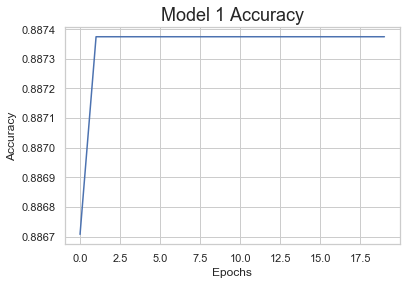

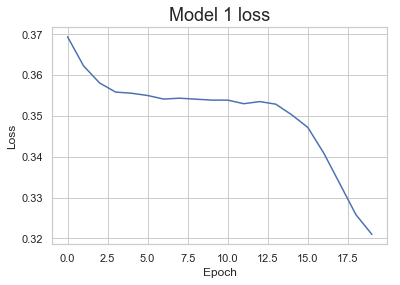


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7309
           1       0.00      0.00      0.00       929

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


 Confusion Matrix 
 [[7309    0]
 [ 929    0]]

 Accuracy: 88.72 %

 F1 Score:  0.47

 Precision:  0.444

 Recall:  0.5


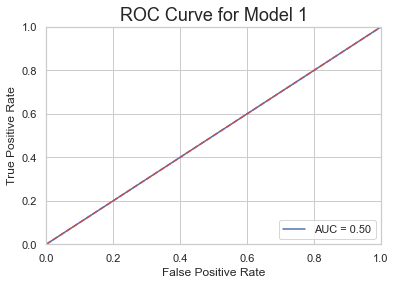

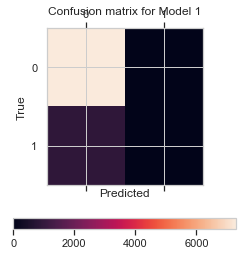

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

#Define model1
def model1():
    model1 = Sequential()

    #input layer 
    model1.add(Dense(64, activation='sigmoid', input_dim=X_train_normalized.shape[1]))
    model1.add(Dropout(0.5))

    #5 hidden layers
    model1.add(Dense(32, activation='sigmoid'))
    model1.add(Dropout(0.4))

    model1.add(Dense(64,activation='exponential'))
    model1.add(Dropout(0.5))

    model1.add(Dense(16,activation='tanh'))

    model1.add(Dense(64,activation='selu'))
    model1.add(Dropout(0.2))

    model1.add(Dense(128,activation='sigmoid'))
    model1.add(Dropout(0.3))

    #Output layer
    model1.add(Dense(2, activation='softmax'))

    #optimizer
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

    #Model fitting
    history = model1.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score = model1.evaluate(X_test_normalized, labels_test, batch_size=512)

    # epoch Vs Accuracy Plot
    plt.plot(history.history['acc'])
    plt.title("Model 1 Accuracy", fontsize = 15)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    # epoch Vs Loss plot
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 15)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    # All evaluations
    print("\n Classification Report \n \n",classification_report(T_test,y_pred))
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    
    fpr, tpr, threshold = roc_curve(T_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    #ROC Plot
    plt.title('ROC Curve for Model 1', fontsize = 15)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    # Confusion Matrix PLot
    plt.matshow(confusion_matrix(T_test, y_pred))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 1', fontsize = 15)
    plt.colorbar(orientation = 'horizontal')
model1()

# Model 2

- This model contains 64 neurons in first layer and then 32 neurons in next layer  and this process is carried on alternatively. 
- Relu and selu are the best activation functions because they avoid vanishing gradient problem.
- So, tried with alternating these activation functions, that is, 'relu' and 'selu'.
- Dropout is not taken in any of these layers. 

### Plots
- Plots for accuracy and loss are also plotted below.
- Confusion matrix, actual-predicted overlapping plots are below.
- ROC-AUC Curve plot is also below.

Epoch 1/20
32950/32950 [==============================] - 3s 90us/step - loss: 0.3148 - acc: 0.8913
Epoch 2/20
32950/32950 [==============================] - 1s 29us/step - loss: 0.2657 - acc: 0.9028
Epoch 3/20
32950/32950 [==============================] - 1s 26us/step - loss: 0.2561 - acc: 0.9036
Epoch 4/20
32950/32950 [==============================] - 1s 44us/step - loss: 0.2546 - acc: 0.9030: 1s - loss: 0.24
Epoch 5/20
32950/32950 [==============================] - 1s 20us/step - loss: 0.2521 - acc: 0.9037
Epoch 6/20
32950/32950 [==============================] - 1s 21us/step - loss: 0.2489 - acc: 0.9046
Epoch 7/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.2483 - acc: 0.9049
Epoch 8/20
32950/32950 [==============================] - 1s 45us/step - loss: 0.2469 - acc: 0.9049: 0s - loss: 0.2548 - acc: 0. - ETA: 0s - loss: 0.2525
Epoch 9/20
32950/32950 [==============================] - 2s 48us/step - loss: 0.2468 - acc: 0.9049
Epoch 10/20
32950/32950 [====

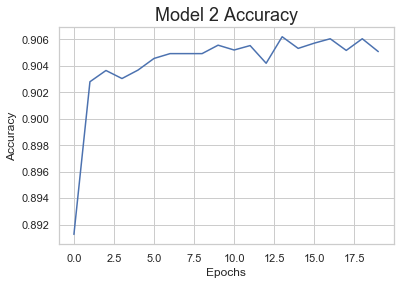

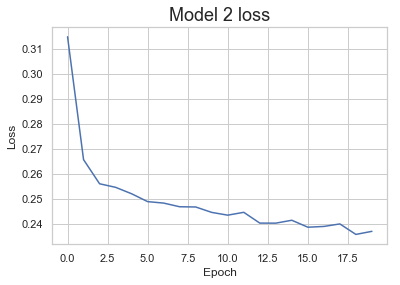


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.64      0.33      0.44       929

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.78      0.65      0.69      8238
weighted avg       0.89      0.90      0.89      8238


 Confusion Matrix 
 [[7133  176]
 [ 621  308]]

 Accuracy: 90.33 %

 F1 Score:  0.692

 Precision:  0.778

 Recall:  0.654


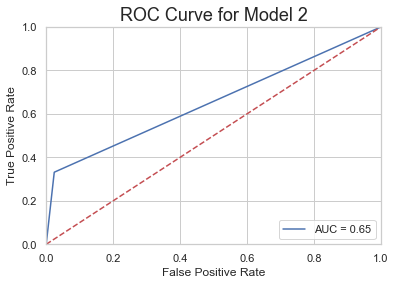

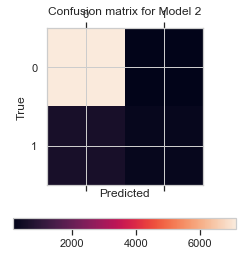

In [41]:
#Define model2
def model2():
    model2 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(64, activation='selu', input_dim=X_train_normalized.shape[1]))

    #adding 6 hidden layers with 64 and 32 neurons alternatively
    model2.add(Dense(32, activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    model2.add(Dense(32,activation='relu'))

    model2.add(Dense(64,activation='selu'))

    #Output layer
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='binary_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['acc'])
    plt.title("Model 2 Accuracy", fontsize = 15)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 15)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    # Evaluating Metrics
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_2))
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))
    
    fpr, tpr, threshold = roc_curve(T_test, y_pred_2)
    roc_auc = auc(fpr, tpr)
    
    # ROC
    plt.title('ROC Curve for Model 2', fontsize = 15)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    #Confusion matrix
    plt.matshow(confusion_matrix(T_test, y_pred_2))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 2', fontsize = 15)
    plt.colorbar(orientation = 'horizontal')

model2()

# Model 3

- This model is the deepest of all.
- Relu and selu are the best activation functions because they avoid vanishing gradient problem.
- So, tried with alternating these activation functions, that is, 'relu' and 'selu'.
- Tried taking a deeper approach by taking 20 hidden layers.
- Experiments are also done on this model.
- I am trying to see if we keep on increasing the number of hidden layers, how will that impact the model.
- Dropout is taken as 0.1 for every hidden layer.
- Tried with less number of neurons, not more than 1024 in each hidden layer.
- The number of neurons in Hidden layers are: 24, 10, 1, 48, 20, 128, 64, 32, 10, 64, 10, 1, 256, 512, 1024, 256, 256, 512, 1024, 256 

### Plots
- Plots for accuracy and loss are also plotted below.
- Confusion matrix, actual-predicted overlapping plots are below.
- ROC-AUC Curve plot is also below.

Epoch 1/20
32950/32950 [==============================] - 28s 865us/step - loss: 0.4575 - acc: 0.8839
Epoch 2/20
32950/32950 [==============================] - 26s 777us/step - loss: 0.3618 - acc: 0.8874
Epoch 3/20
32950/32950 [==============================] - 28s 837us/step - loss: 0.3595 - acc: 0.8812
Epoch 4/20
32950/32950 [==============================] - 23s 684us/step - loss: 0.3406 - acc: 0.8858
Epoch 5/20
32950/32950 [==============================] - 24s 722us/step - loss: 0.3132 - acc: 0.8861
Epoch 6/20
32950/32950 [==============================] - 26s 795us/step - loss: 0.2995 - acc: 0.8877
Epoch 7/20
32950/32950 [==============================] - 25s 765us/step - loss: 0.2963 - acc: 0.8887
Epoch 8/20
32950/32950 [==============================] - 28s 849us/step - loss: 0.2955 - acc: 0.8877
Epoch 9/20
32950/32950 [==============================] - 24s 721us/step - loss: 0.2897 - acc: 0.8896
Epoch 10/20
32950/32950 [==============================] - 25s 769us/step - loss: 

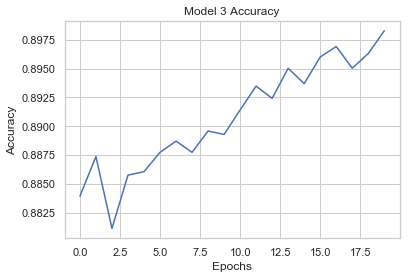

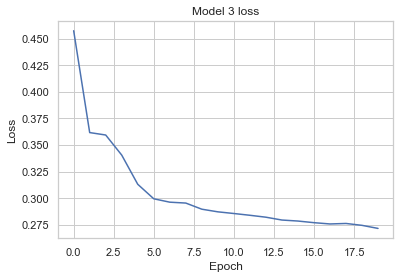


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7309
           1       0.59      0.16      0.25       929

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.75      0.57      0.60      8238
weighted avg       0.87      0.89      0.86      8238


 Confusion Matrix 
 [[7204  105]
 [ 779  150]]

 Accuracy: 89.27 %

 F1 Score:  0.598

 Precision:  0.745

 Recall:  0.574


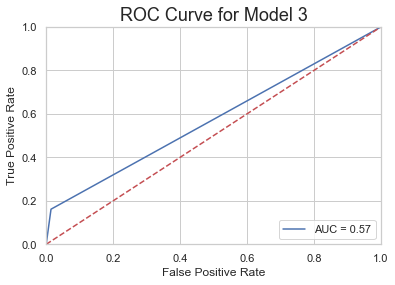

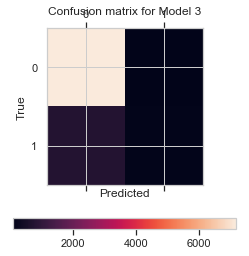

In [42]:
#Define model3
def model3():
    model3 = Sequential()
    
    # input layer
    model3.add(Dense(X_train_normalized.shape[1], activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 20 hidden layers
    model3.add(Dense(24, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(48, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(20, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(128, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64, activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(32,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(64,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(10,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(512,activation='selu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(1024,activation='relu'))
    model3.add(Dropout(0.1))

    model3.add(Dense(256,activation='selu'))
    model3.add(Dropout(0.1))
    
    #output layer
    model3.add(Dense(2, activation='softmax'))

    #Optimizing
    rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #Model Fitting
    history = model3.fit(X_train_normalized, labels, epochs=20, batch_size=512, verbose=1)

    #Model Evaluation
    score_3 = model3.evaluate(X_test_normalized, labels_test, batch_size=512)

    #Epoch Vs Accuracy Plot
    plt.plot(history.history['acc'])
    plt.title("Model 3 Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Epoch vs Loss Plot
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predicting the test values
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #Classification report
    print("\n Classification Report \n \n",classification_report(T_test,y_pred_3))

    #Confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))

    fpr, tpr, threshold = roc_curve(T_test, y_pred_3)
    roc_auc = auc(fpr, tpr)
    
    #ROC code 
    plt.title('ROC Curve for Model 3', fontsize = 18)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
    
    plt.matshow(confusion_matrix(T_test, y_pred_3))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix for Model 3', fontsize = 12)
    plt.colorbar(orientation = 'horizontal')
model3()

# Results

**Note: Plots for results are plotted above along with each model.**

### Discussion About Evaluation Metrics

In this section, we will discuss some popular classification measurements that I have used to evaluate metrics for our models that we implemented in previous section.

To find the best model, accuracy needs to be calcuated. It helps to judge which model is the best. It helps to find the overall accuracy and is formulated as below:

$$
   \text{Accuracy} = \frac{\text{number of correct classification}}{\text{number of samples}}.
$$


#### Confusion Matrix

In confusion Matrix, each row represents the predictions from model and column represents the actual classes.
- <b>TP or True positives</b> are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
- <b>Tn or True negatives</b> are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
- <b>FP or False positives </b> are the cases when the actual class of the data point was 0(False) and the predicted is 1(True)
- <b>FN or False negatives</b> are the cases when the actual class of the data point was 1(True) and the predicted is 0(False)

Accuracy of a confusion matrix is calculated as: 

Accuracy = (TP+TN)/(TP+FP+TN+FN)

Metrics:

- Precision: It is the accuracy of positive predictions.

- Recall or Sensitivity:  It represents how well does the model cover the positive class.

- F1 Score: It is the harmonic mean of precision and recall as only one output is receive which is good for measuring.

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

### The ROC Curve
It plots TP vs FP.

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)

When the classification results are good, the curve gets closer to rectangular curve, close to 1 on the 0 FPR.

#### Specificity
Specificity is Number of items correctly identified as negative out of total negatives.

#### Type I Error (FPR)
Number of items wrongly identified as positive out of total true negatives.

#### Type II Error (FNR)
Number of items wrongly identified as negative out of total true positives.

####  AUC - ROC aka AUROC(Area Under the Receiver Operating Characteristics) Curve


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. 
However AUC score of a random classifier for balanced data is 0.5

## Discussions about the choice of network structures

|**Models** | **hlayers** | **hunits** |**Accuracy** | **F1 Score** | **Precision** | **Recall** | **ROC-AUC** | 
|-----------|-------------|------------|-------------|--------------|---------------|------------|-------------|
|**Model 1**    | 5  |$$32,64,16,64,128$$ |  88.72%    |0.47         |0.44         |0.5       |0.5      |
|**Model 2**  | 6     |$$32,64,32,64,32$$     |    90.33%    |0.69         |0.77         |0.65       |0.65|
|**Model 3**   | 20  | $$24,10,1,48,20,128,64,32,10,64,10,1,256,512,1024,256,256,512,1024,256$$ | 89.27%  |0.59 |0.74 |0.57|0.57  |


On an average, it can be observed that Model 2 performs the best as it has the best accuracy, F1 score, and other performance metrics above.
Higher ROC-AUC gives us the better classification deep learning network.
Model 1 performs the worst of these 3 models as it was made randomly.
From this, it can be concluded that Model 2 is the best as it uses relu and selu as the activation functions and no dropout.

**Hence, Model 2 is the best.**

# Conclusions

- This was an interesing assignment. I got to learn a lot of new concepts about deep learning.
- Learned how to use Keras.
- Learned how to build different deep learning networks and compare them.
- Deadline felt a bit short to complete this assignment.
- I feel that Keras is easier to use and implement as compared to TF.
- Calculated precision, recall, F-measure etc.
- Tried model with different hidden layers and different activation function. Got to know a lot about their behavior.

Overall, really enjoyed working on this assignment using libraries and not implementing previously existing stuff.

Suggestion: Writing part should be of less weightage. It is too time consuming which sometimes can compromise learning.

# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 

# Additional Analysis for training Speed with GPUs

I used Google Colab to test the training speed of these models and my observations are below.
First, I'll record time on my local CPU and after that compare to GPU.

In [43]:
training_time_local = []

Epoch 1/20
32950/32950 [==============================] - 3s 96us/step - loss: 0.3777 - acc: 0.8848
Epoch 2/20
32950/32950 [==============================] - 1s 25us/step - loss: 0.3621 - acc: 0.8874
Epoch 3/20
32950/32950 [==============================] - 1s 25us/step - loss: 0.3585 - acc: 0.8874
Epoch 4/20
32950/32950 [==============================] - 1s 27us/step - loss: 0.3554 - acc: 0.8874
Epoch 5/20
32950/32950 [==============================] - 1s 23us/step - loss: 0.3555 - acc: 0.8874
Epoch 6/20
32950/32950 [==============================] - 1s 27us/step - loss: 0.3550 - acc: 0.8874
Epoch 7/20
32950/32950 [==============================] - 1s 23us/step - loss: 0.3547 - acc: 0.8874
Epoch 8/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.3537 - acc: 0.8874
Epoch 9/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.3544 - acc: 0.8874
Epoch 10/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.3542 - acc: 0.8874

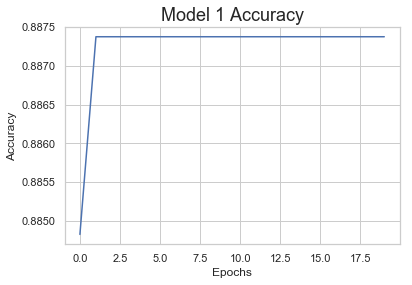

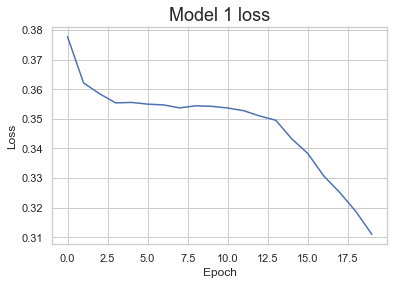


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7309
           1       0.00      0.00      0.00       929

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


 Confusion Matrix 
 [[7309    0]
 [ 929    0]]

 Accuracy: 88.72 %

 F1 Score:  0.47

 Precision:  0.444

 Recall:  0.5


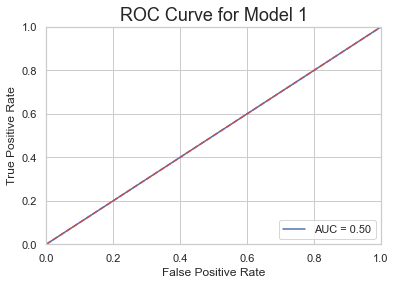

Time taken by Model 1 :  22.2283833026886 seconds


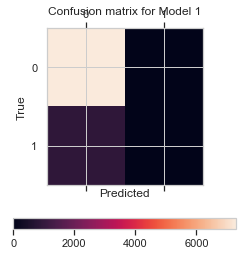

In [44]:
import time
start1 = time.time()
model1()
end1 = time.time()
print("Time taken by Model 1 : ",(end1 - start1),"seconds")
training_time_local.append((end1 - start1))

Epoch 1/20
32950/32950 [==============================] - 3s 87us/step - loss: 0.3203 - acc: 0.8800
Epoch 2/20
32950/32950 [==============================] - 1s 17us/step - loss: 0.2661 - acc: 0.9014
Epoch 3/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2579 - acc: 0.9029
Epoch 4/20
32950/32950 [==============================] - 1s 22us/step - loss: 0.2551 - acc: 0.9031
Epoch 5/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2513 - acc: 0.9054
Epoch 6/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2497 - acc: 0.9041
Epoch 7/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2490 - acc: 0.9048
Epoch 8/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2477 - acc: 0.9060
Epoch 9/20
32950/32950 [==============================] - 1s 18us/step - loss: 0.2466 - acc: 0.9049: 0s - loss: 0.2526 - acc
Epoch 10/20
32950/32950 [==============================] - 1s 18us/step - l

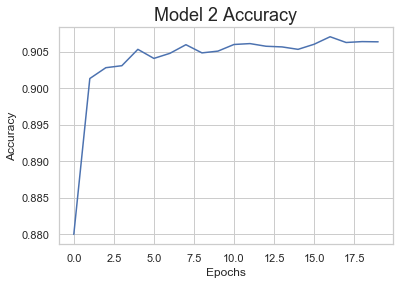

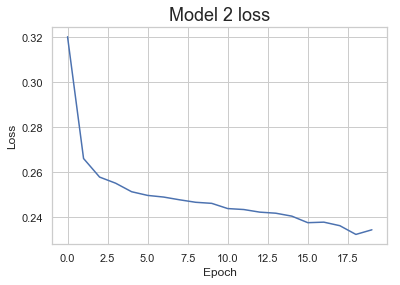


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7309
           1       0.60      0.42      0.49       929

   micro avg       0.90      0.90      0.90      8238
   macro avg       0.76      0.69      0.72      8238
weighted avg       0.89      0.90      0.89      8238


 Confusion Matrix 
 [[7049  260]
 [ 543  386]]

 Accuracy: 90.25 %

 F1 Score:  0.718

 Precision:  0.763

 Recall:  0.69


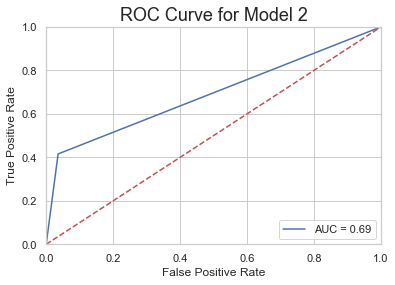

Time taken by Model 2 :  18.773112535476685 seconds


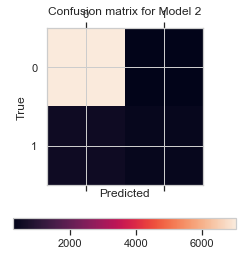

In [45]:
start2 = time.time()
model2()
end2 = time.time()
print("Time taken by Model 2 : ",(end2 - start2),"seconds")
training_time_local.append((end2 - start2))

Epoch 1/20
32950/32950 [==============================] - 15s 454us/step - loss: 1.7933 - acc: 0.8833
Epoch 2/20
32950/32950 [==============================] - 9s 263us/step - loss: 1.8153 - acc: 0.8874
Epoch 3/20
32950/32950 [==============================] - 9s 263us/step - loss: 1.8153 - acc: 0.8874
Epoch 4/20
32950/32950 [==============================] - 9s 263us/step - loss: 1.8153 - acc: 0.8874
Epoch 5/20
32950/32950 [==============================] - 9s 266us/step - loss: 1.8153 - acc: 0.8874
Epoch 6/20
32950/32950 [==============================] - 9s 272us/step - loss: 1.8153 - acc: 0.8874
Epoch 7/20
32950/32950 [==============================] - 9s 259us/step - loss: 1.8153 - acc: 0.8874
Epoch 8/20
32950/32950 [==============================] - 8s 255us/step - loss: 1.8153 - acc: 0.8874
Epoch 9/20
32950/32950 [==============================] - 8s 257us/step - loss: 1.8153 - acc: 0.8874
Epoch 10/20
32950/32950 [==============================] - 9s 267us/step - loss: 1.8153 - 

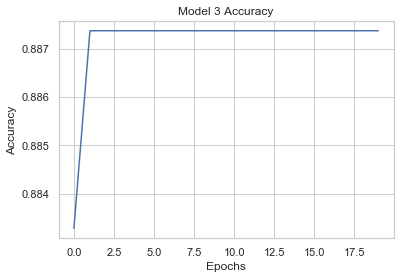

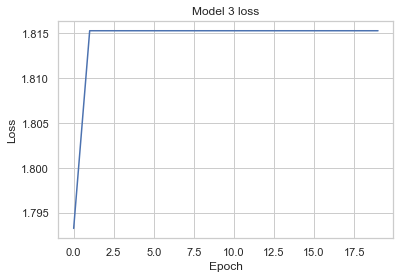


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7309
           1       0.00      0.00      0.00       929

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


 Confusion Matrix 
 [[7309    0]
 [ 929    0]]

 Accuracy: 88.72 %

 F1 Score:  0.47

 Precision:  0.444

 Recall:  0.5


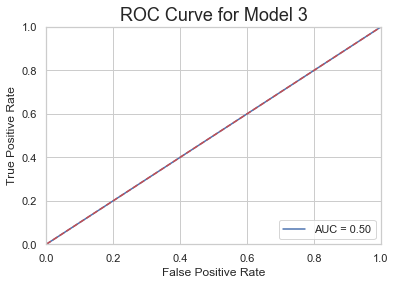

Time taken by Model 3 :  190.3597674369812 seconds


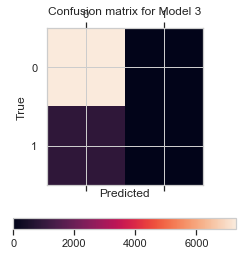

In [46]:
start3 = time.time()
model3()
end3 = time.time()
print("Time taken by Model 3 : ",(end3 - start3),"seconds")
training_time_local.append((end3 - start3))

In [47]:
training_time_local

[22.2283833026886, 18.773112535476685, 190.3597674369812]

Exporting the data to be used for Google Colab to calculate time taken by GPU.

In [48]:
from pandas import DataFrame
df = DataFrame(X_train)
df.to_csv("X_tr.csv", index = None, header=True)
df = DataFrame(T_train)
df.to_csv("T_tr.csv", index = None, header=True)
df = DataFrame(X_test)
df.to_csv("X_t.csv", index = None, header=True)
df = DataFrame(T_test)
df.to_csv("T_ts.csv", index = None, header=True)

Ran all the 3 models in Google Colab with GPU enabled.
 
 Google Colab Notebook : https://colab.research.google.com/drive/1MTJakHjqISCyUMH2V6O1QbYpMXZRQmCh

In [49]:
#Copying the Runtimes on GPU from Colab
training_time_gpu = [9.717464923858643, 9.715609550476074, 21.952449321746826]

In [51]:
time_taken = pd.DataFrame({'Model': ['Model 1','Model 2', 'Model 3'],'GPU' : training_time_gpu, 'Local' : training_time_local})
time_taken

,Model,GPU,Local
0,Model 1,9.717465,22.228383
1,Model 2,9.715610,18.773113
2,Model 3,21.952449,190.359767


- From this it can be observed that GPU is way faster than local CPU.
- As the number of layers increases as in Model 3, the performance difference can be significantly noticed.

Same can be visualized by the plot below that compares run times with and without GPU.

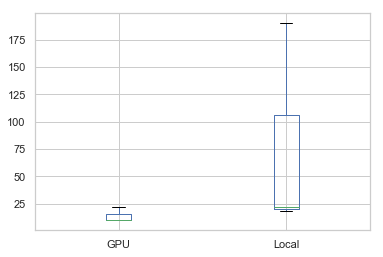

In [52]:
boxplot = time_taken.boxplot(column=['GPU', 'Local'])

# REFERENCES
[1] S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing", Decision Support Systems, Elsevier, 62:22-31, June 2014, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[2] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[3] "Statistical classification”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Statistical_classification

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

[7] Janio, "Melbourne || Comprehensive Housing Market Analysis", Kaggle, Data Repository, https://www.kaggle.com/janiobachmann/melbourne-comprehensive-housing-market-analysis

[8] Jake VanderPlas, "Multiple Subplots", Python Data Science Handbook, https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

[9] Hack-R, Stack Overflow, "Pandas: ValueError: cannot convert float NaN to integer"(2018) , https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer?rq=1

[10] "Deep Learning", Wikipedia, https://en.wikipedia.org/wiki/Deep_learning

[11] DanB, "Handling Missing Values", Kaggle, Data Repository, https://www.kaggle.com/dansbecker/handling-missing-values

[12] Discriminant-Function-Analysis(Textbook), "Discover Which Variables Discriminate Between Groups, Discriminant Function Analysis", www.statsoft.com/Textbook/Discriminant-Function-Analysis

[13] Mohammed Sunasra, "Performance Metrics for Classification problems in Machine Learning", Thalus, Medium(2017), https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

[14] Mahat,"LogisticRegression", Github, Repository(2016), https://github.com/mahat/LogisticRegression

[15] Skymind, "A Beginner's Guide to Neural Networks and Deep Learning", AI Wiki(2018),https://skymind.ai/wiki/neural-network

[16] Matplotlib library, "matplotlib.pyplot.xlim", Matplotlib (2014),https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html

[17] D. Arora, "Machine Learning", Github, Repository, https://github.com/dhananjay-arora/Machine-Learning

[18] Scikit-learn, "3.2.4.1.5. sklearn.linear_model.LogisticRegressionCV", ScikitLearn library, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

[19] "Confusion Matrix”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Confusion_matrix

[20] Jason Brownlee. "Dropout Regularization in Deep Learning Models With Keras", June 20, 2016
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

[21] François Chollet. "Keras", 2015,
https://keras.io/getting-started/sequential-model-guide/

[22] Aurélien Géron, "_Hands on Machine learning with scikit learn and Tensorflow_", O'Reilly Media, 2017
   

## Grammar and Spelling errors

Proofread by Grammarly